In [1]:
import sys
sys.path.append('..')
sys.path.append('../stylegan3')

from stylegan_generator import StyleGANGenerator

import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_path = '/home/robert/data/diploma-thesis/datasets/stylegan3/tpsi_1/latents/sample_z.h5'
targets_path = '/home/robert/data/diploma-thesis/predictions/stylegan3/tpsi_1/resnet34_eyeglasses.pkl'

In [3]:
network_pkl = 'https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhqu-1024x1024.pkl'
generator = StyleGANGenerator(network_pkl)

In [13]:
tpsi = [0.1, 0.3, 0.5, 0.7, 0.8, 0.9, 1.0]

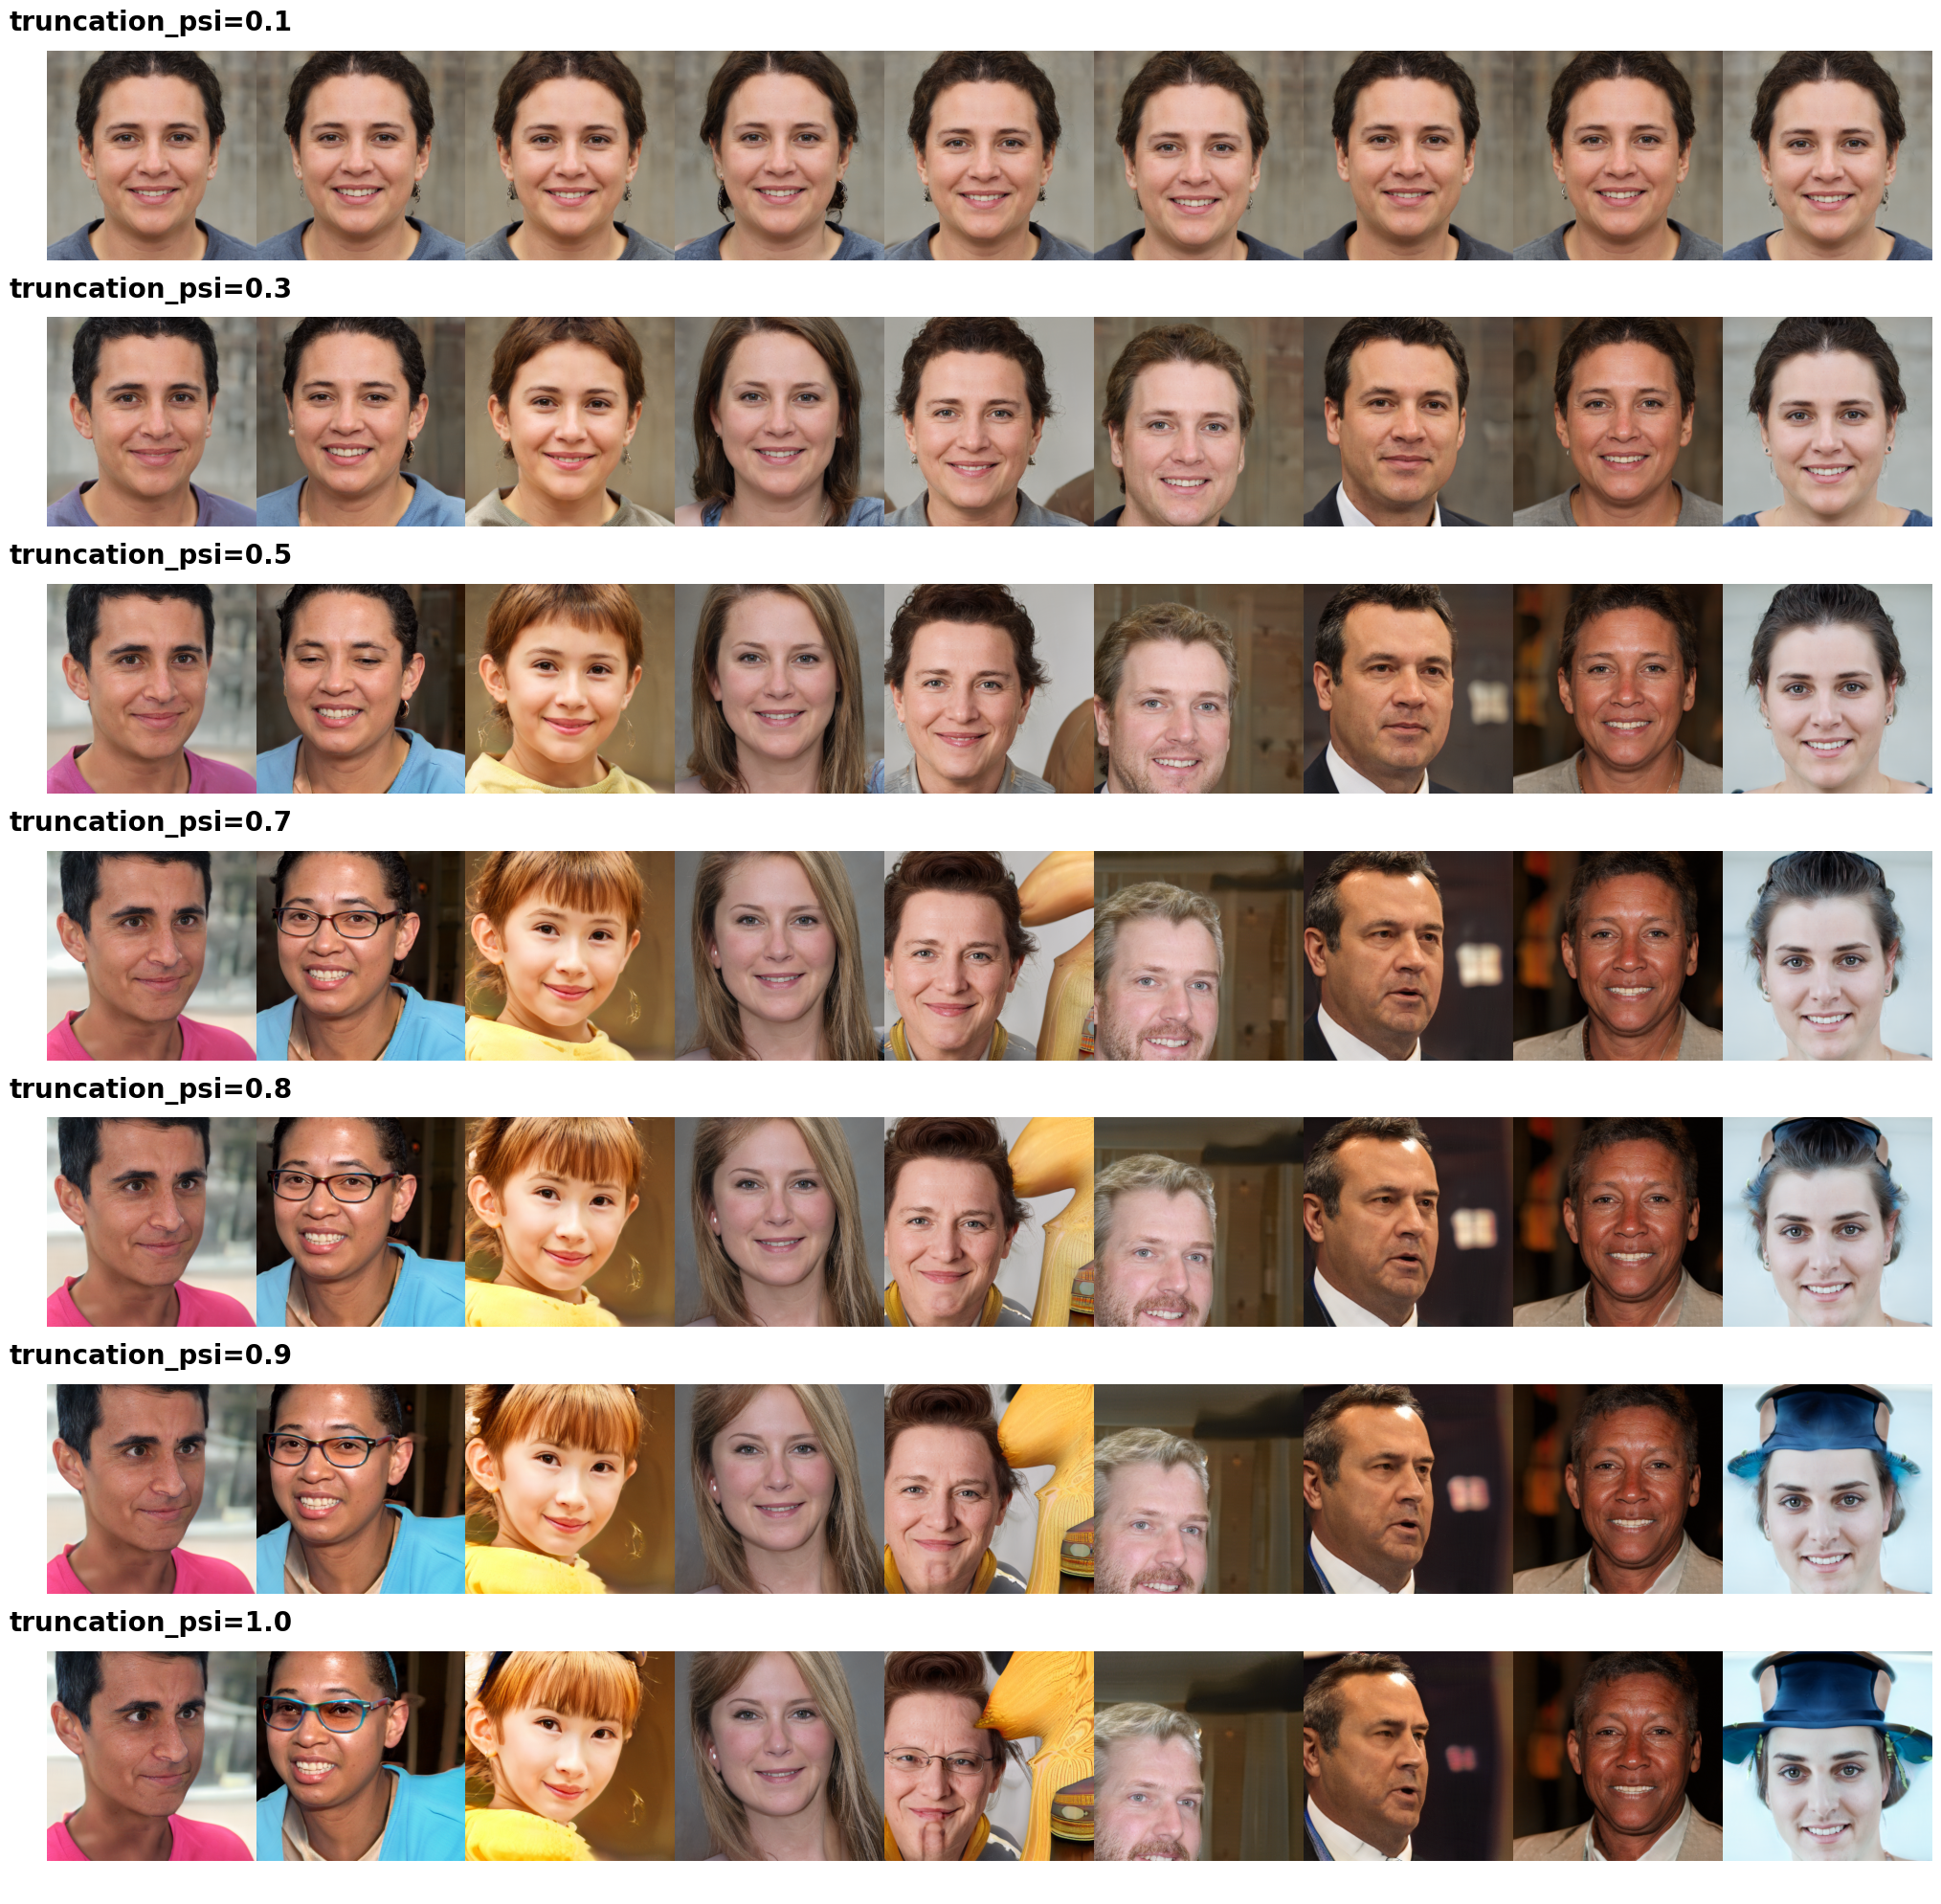

In [17]:
fig = plt.figure(figsize=(20, 20))
columns = 9 # images
rows = 7 # psi
# for each image feature
for i in range(rows):
    # for each image in current feature
    np.random.seed(24)
    z = np.random.randn(columns, generator.G.z_dim)
    imgs = generator.generate_from(z, truncation_psi = tpsi[i])
    
    for j in range(columns):
        plt.axis('off')
        fig.tight_layout()
        ax = fig.add_subplot(rows, columns, i*columns+j+1)
        
        if j == 0:
            ax.set_title('truncation_psi='+str(tpsi[i]), fontsize=20, pad=15, fontweight="bold") # print feature name
        
        plt.subplots_adjust(wspace=0.0) # right next to each other
        plt.imshow(imgs[j]/255) # show image

plt.axis('off')
plt.show()